In [9]:
import pandas as pd
import numpy as np
import os
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

plt.rcParams['figure.figsize'] = (10, 5)
plt.style.use('ggplot')

path = "/Users/casadei/dev/casadei/gsgp-mo/results"
approaches = [
    'random-without-replacement', 
    'kmeans'
]
classes = range(2, 6)
colors = ['red', 'blue', 'green', 'yellow', 'pink']
markers = ['o', '+', '^', 'v', 'x']
datasets = ['keijzer-1', 'vladislavleva-1']

In [72]:
def getColors(colors, feedback):
    result = []
    for i, curr in enumerate(feedback):
        result.append(colors[curr])
        
    return result

def selectExecution(df, execution):
    filtered = df[df[0] == execution - 1]
    return filtered.iloc[0,1:]

def render2d(strategy, k, dataset, mode, execution = 1):
    filename = "%s/%s-%d/output-%s/groups-%02d.txt" % (path, strategy, k, dataset, execution)
    data = pd.read_csv(filename, skiprows=[0], header = None)
    data = data[data[0] == mode]

    for i in range(0, k):
        group = data[data[1] & 2**i > 0]
        plt.scatter(group[2], group[3], c=colors[i], label = 'Group ' + str(i + 1), alpha = 0.5)

    plt.title("clustered %s using k=%d applied to %s" % (strategy, k, dataset))
    plt.legend()
    plt.show()
    
def render2dFeedback(strategy, k, dataset, mode, execution):
    directory = "%s/%s-%d/output-%s/" % (path, strategy, k, dataset)
    filename = "%s/groups-%02d.txt" % (directory, execution)
    
    if mode == 'TRAINING':
        files = ('smart_tr_outputs.csv', 'smart_tr_feedback.csv')
    else:
        files = ('smart_ts_outputs.csv', 'smart_ts_feedback.csv')
    
    semantics = selectExecution(pd.read_csv(directory + files[0], header = None), execution)    
    feedback = selectExecution(pd.read_csv(directory + files[1], header = None), execution)

    data = pd.read_csv(filename, skiprows=[0], header = None)
    data = data[data[0] == mode]

    plt.scatter(data[2], semantics, c=getColors(colors, feedback), alpha = 0.5)
    plt.title("feedback of %s using k=%d applied to %s" % (strategy, k, dataset))
    plt.show()
        
def render3d(strategy, k, dataset, mode, execution = 1):
    filename = "%s/%s-%d/output-%s/groups-%02d.txt" % (path, strategy, k, dataset, execution)
    data = pd.read_csv(filename, skiprows=[0], header = None)
    data = data[data[0] == mode]

    fig = plt.figure()
    ax = Axes3D(fig)

    for i in range(0, k):
        group = data[data[1] & 2**i > 0]
        ax.scatter(group[2], group[3], group[4], c=colors[i], label = 'Group ' + str(i + 1), alpha = 0.5)

    plt.title("clustered %s - %s using k=%d applied to %s" % (mode, strategy, k, dataset))
    plt.legend()
    plt.show()
    
def render3dFeedback(strategy, k, dataset, mode, execution = 1):
    directory = "%s/%s-%d/output-%s/" % (path, strategy, k, dataset)
    filename = "%s/groups-%02d.txt" % (directory, execution)
    
    if mode == 'TRAINING':
        files = ('smart_tr_outputs.csv', 'smart_tr_feedback.csv')
    else:
        files = ('smart_ts_outputs.csv', 'smart_ts_feedback.csv')
    
    semantics = selectExecution(pd.read_csv(directory + files[0], header = None), execution)    
    feedback = selectExecution(pd.read_csv(directory + files[1], header = None), execution)
    
    data = pd.read_csv(filename, skiprows=[0], header = None)
    data = data[data[0] == mode]
    
    fig = plt.figure()
    ax = Axes3D(fig)

    ax.scatter(data[2], data[3], semantics, c=getColors(colors, feedback), alpha = 0.5)

    plt.title("feedback %s - %s using k=%d applied to %s" % (mode, strategy, k, dataset))
    plt.show()
    

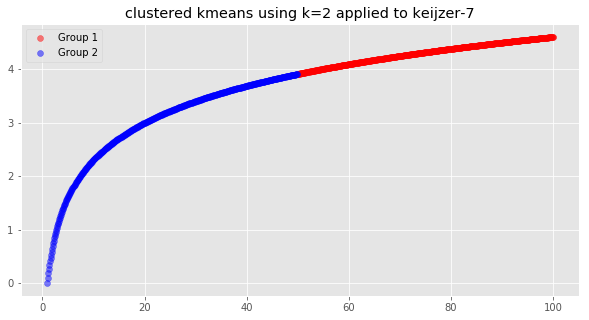

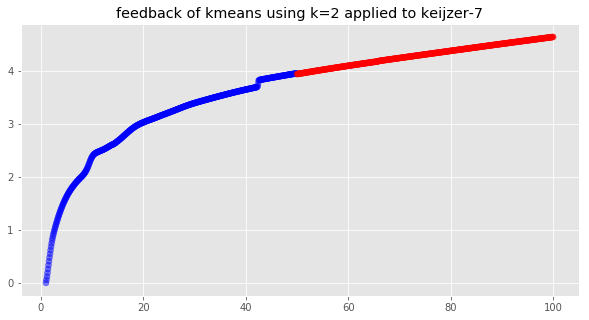

In [67]:
strategy = 'kmeans'
k = 2
render2d(strategy, k, 'keijzer-7', 'TEST', 33)
render2dFeedback(strategy, k, 'keijzer-7', 'TEST', 33)

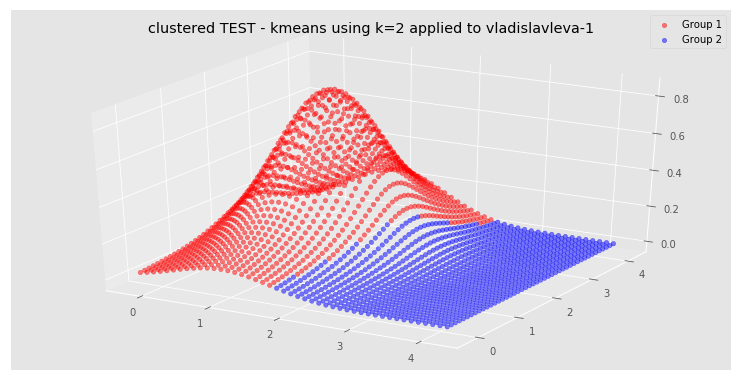

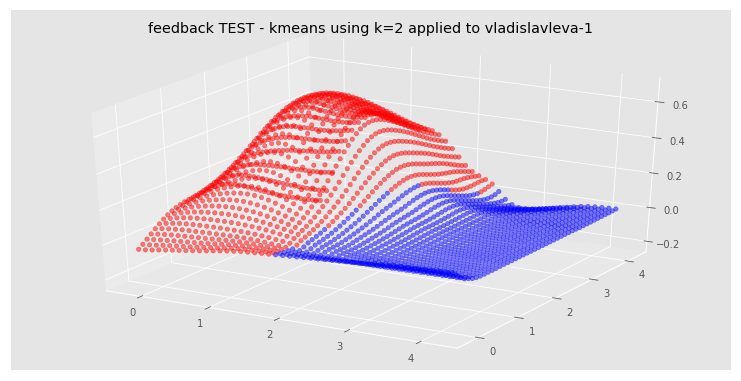

In [52]:
strategy = 'kmeans'
k = 2
render3d(strategy, k, 'vladislavleva-1', 'TEST', 31)
render3dFeedback(strategy, k, 'vladislavleva-1', 'TEST', 31)

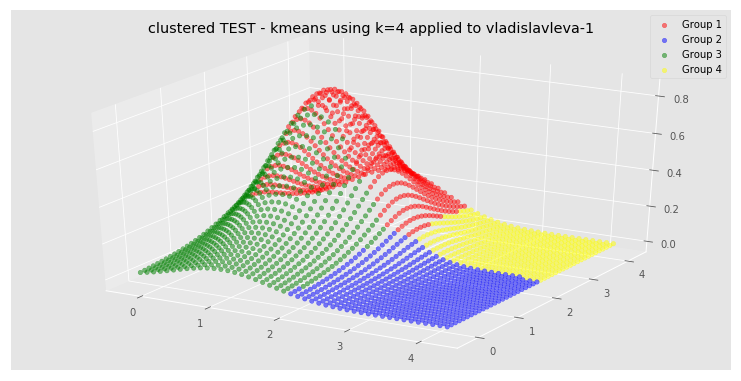

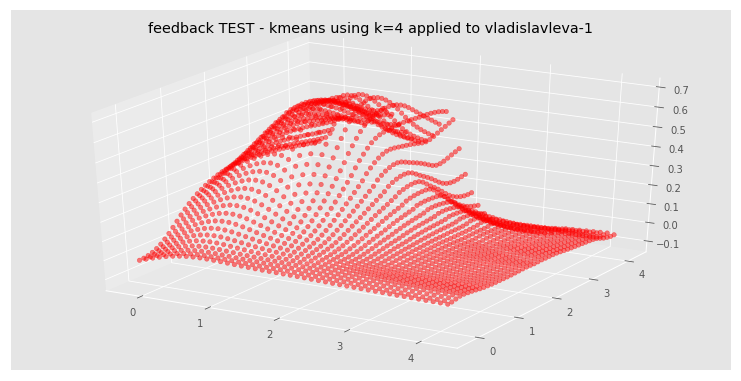

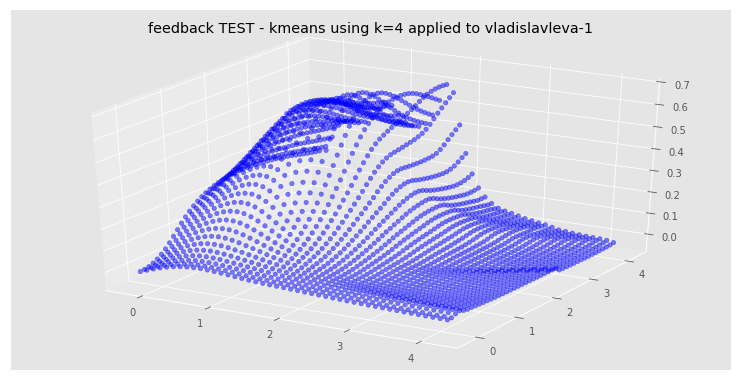

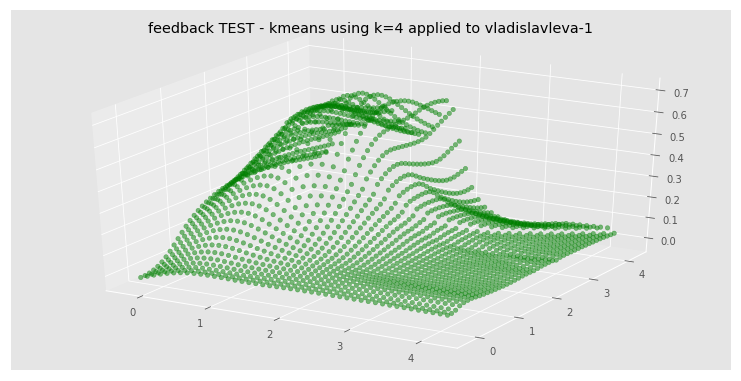

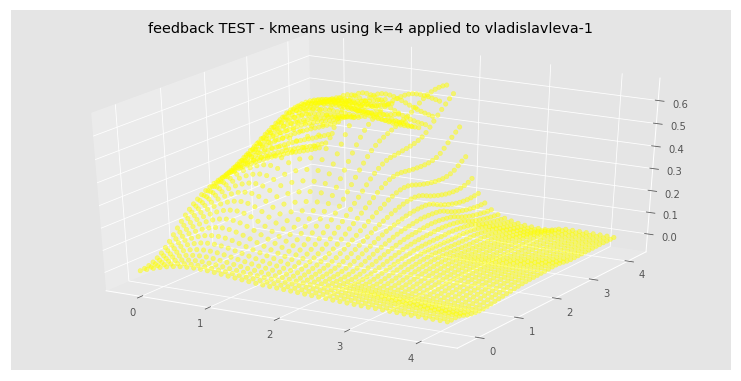

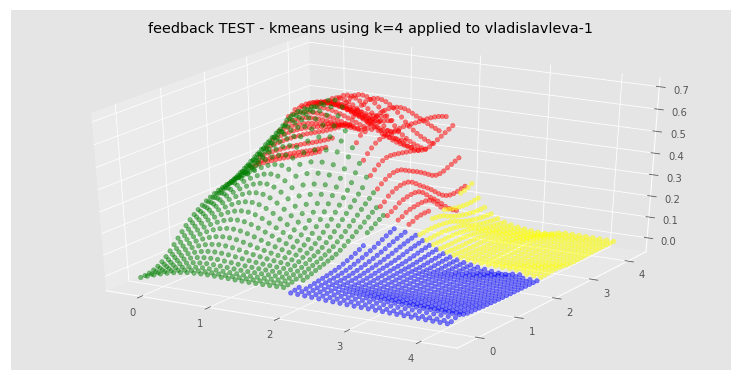

In [121]:
def render2dIndividuals(strategy, k, dataset, mode, execution):
    directory = "%s/%s-%d/output-%s/" % (path, strategy, k, dataset)
    filename = "%s/groups-%02d.txt" % (directory, execution)
    
    if mode == 'TRAINING':
        file = 'trOutputs.csv'
    else:
        file = 'tsOutputs.csv'
    
    semantics = selectExecution(pd.read_csv(directory + file, header = None, sep = "[,|\|]", engine="python"), execution)    
    data = pd.read_csv(filename, skiprows=[0], header = None)
    data = data[data[0] == mode]
    
    individuals = int(semantics.shape[0] / data.shape[0])

    for i in range(0, individuals):
        start = i * data.shape[0]
        end = start + data.shape[0]
        plt.scatter(data[2], semantics[start:end], c=colors[i], alpha = 0.1)
        plt.title("feedback of %s using k=%d applied to %s" % (strategy, k, dataset))
        plt.show()

def render3dIndividuals(strategy, k, dataset, mode, execution = 1):
    directory = "%s/%s-%d/output-%s/" % (path, strategy, k, dataset)
    filename = "%s/groups-%02d.txt" % (directory, execution)
    
    if mode == 'TRAINING':
        file = 'trOutputs.csv'
    else:
        file = 'tsOutputs.csv'
        
    semantics = selectExecution(pd.read_csv(directory + file, header = None, sep = "[,|\|]", engine="python"), execution)    
    data = pd.read_csv(filename, skiprows=[0], header = None)
    data = data[data[0] == mode]
    
    individuals = int(semantics.shape[0] / data.shape[0])

    for i in range(0, individuals):
        start = i * data.shape[0]
        end = start + data.shape[0]
        fig = plt.figure()
        ax = Axes3D(fig)        
        ax.scatter(data[2], data[3], semantics[start:end], c=colors[i], alpha = 0.5)
        plt.title("feedback %s - %s using k=%d applied to %s" % (mode, strategy, k, dataset))
        plt.show()
    
        
#render2dIndividuals(strategy, 3, 'keijzer-7', 'TEST', 27)
#render2dFeedback(strategy, 3, 'keijzer-7', 'TEST', 27)
render3d(strategy, 4, 'vladislavleva-1', 'TEST', 27)
render3dIndividuals(strategy, 4, 'vladislavleva-1', 'TEST', 27)
render3dFeedback(strategy, 4, 'vladislavleva-1', 'TEST', 27)